In [1]:
import pandas as pd
import numpy as np

## Cleanup Users and Repos dataframes

In [2]:
repos = pd.read_csv('data/active_projects.csv', sep='\t')
repos.info()
repos.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228180 entries, 0 to 228179
Data columns (total 7 columns):
id             228180 non-null int64
url            228180 non-null object
owner_id       228180 non-null int64
name           228174 non-null object
language       228180 non-null object
created_at     228180 non-null object
forked_from    228180 non-null object
dtypes: int64(2), object(5)
memory usage: 12.2+ MB


,id,url,owner_id,name,language,created_at,forked_from
0,27750972,https://api.github.com/repos/Electronics-Ninja...,7259404,BBB_python,Python,2015-10-22 01:13:11,\N
1,28683824,https://api.github.com/repos/d0u9/.dot,8629487,.dot,VimL,2015-11-29 10:34:32,\N
2,1808,https://api.github.com/repos/candlepin/subscri...,9548,subscription-manager,Python,2012-05-17 16:13:30,\N
3,28922584,https://api.github.com/repos/greenalpha/utxx,10557672,utxx,C++,2015-11-17 16:14:36,2149824
4,9884164,https://api.github.com/repos/endlessm/linux,2234193,linux,C,2014-05-20 18:43:21,\N


In [56]:
repos.id.sort_values().head()

66398     3
1564      6
1298     19
21232    32
3986     63
Name: id, dtype: int64

In [57]:
repos.loc[repos.forked_from == '\N', 'forked_from'] = '0'

In [66]:
repos.forked_from = pd.to_numeric(repos.forked_from)

In [68]:
repos.created_at = pd.to_datetime(repos.created_at)

In [69]:
repos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228180 entries, 0 to 228179
Data columns (total 7 columns):
id             228180 non-null int64
url            228180 non-null object
owner_id       228180 non-null int64
name           228180 non-null object
language       228180 non-null object
created_at     228180 non-null datetime64[ns]
forked_from    228180 non-null int64
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 12.2+ MB


In [70]:
# repos.to_pickle('data/pickled/active_repos.pkl')

In [34]:
users = pd.read_csv('data/active_users.csv', sep='\t')
users.info()
users.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159321 entries, 0 to 159320
Data columns (total 9 columns):
id              159321 non-null int64
login           159321 non-null object
company         159289 non-null object
created_at      159321 non-null object
type            159321 non-null object
country_code    159321 non-null object
state           159321 non-null object
city            159321 non-null object
location        159319 non-null object
dtypes: int64(1), object(8)
memory usage: 10.9+ MB


,id,login,company,created_at,type,country_code,state,city,location
0,7259404,Electronics-Ninja,\N,2015-03-05 02:56:43,USR,\N,\N,\N,\N
1,8629487,d0u9,▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒,2014-03-23 12:52:20,USR,\N,\N,\N,░░░░░░░░░░░░░░░
2,9548,candlepin,\N,2012-05-17 14:02:36,ORG,\N,\N,\N,\N
3,10557672,greenalpha,\N,2015-11-11 02:05:28,USR,\N,\N,\N,\N
4,2234193,endlessm,\N,2012-07-06 04:09:10,ORG,\N,\N,\N,\N


In [47]:
users.location.fillna('\\N',inplace = True)

In [72]:
users.created_at = pd.to_datetime(users.created_at)

In [73]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159321 entries, 0 to 159320
Data columns (total 9 columns):
id              159321 non-null int64
login           159321 non-null object
company         159321 non-null object
created_at      159321 non-null datetime64[ns]
type            159321 non-null object
country_code    159321 non-null object
state           159321 non-null object
city            159321 non-null object
location        159321 non-null object
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 10.9+ MB


In [74]:
# users.to_pickle('data/pickled/active_users.pkl')

## Create Forked repo relationships between User -> Repo

In [95]:
repos = pd.read_pickle('data/pickled/active_repos.pkl')
users = pd.read_pickle('data/pickled/active_users.pkl')


In [96]:
repos.info()
print "-----------------------------------"
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228180 entries, 0 to 228179
Data columns (total 7 columns):
id             228180 non-null int64
url            228180 non-null object
owner_id       228180 non-null int64
name           228180 non-null object
language       228180 non-null object
created_at     228180 non-null datetime64[ns]
forked_from    228180 non-null int64
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 12.2+ MB
-----------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159321 entries, 0 to 159320
Data columns (total 9 columns):
id              159321 non-null int64
login           159321 non-null object
company         159321 non-null object
created_at      159321 non-null datetime64[ns]
type            159321 non-null object
country_code    159321 non-null object
state           159321 non-null object
city            159321 non-null object
location        159321 non-null object
dtypes: datetime64[ns](1), int64(1), object(7

In [97]:
forked = repos[['owner_id', 'forked_from', 'created_at']]
forked = forked.rename(columns={'owner_id': 'user_id', 'forked_from': 'repo_id'})
forked['forked'] = 2
forked.head()
forked.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228180 entries, 0 to 228179
Data columns (total 4 columns):
user_id       228180 non-null int64
repo_id       228180 non-null int64
created_at    228180 non-null datetime64[ns]
forked        228180 non-null int64
dtypes: datetime64[ns](1), int64(3)
memory usage: 7.0 MB


In [98]:
forked = forked[forked.repo_id != 0]
forked.info()
forked.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133747 entries, 3 to 228179
Data columns (total 4 columns):
user_id       133747 non-null int64
repo_id       133747 non-null int64
created_at    133747 non-null datetime64[ns]
forked        133747 non-null int64
dtypes: datetime64[ns](1), int64(3)
memory usage: 5.1 MB


,user_id,repo_id,created_at,forked
3,10557672,2149824,2015-11-17 16:14:36,2
8,7951407,51352312,2017-02-07 13:29:06,2
9,138931,3489262,2017-03-07 10:16:07,2
14,4611054,9805335,2017-01-23 06:15:41,2
17,2135533,51272249,2016-12-08 13:17:53,2


In [99]:
forked.to_pickle('data/pickled/active_forks.pkl')

## Combine the Star and Fork actions dfs to create implicit ratings

In [179]:
forks = pd.read_pickle('data/pickled/active_forks.pkl')
stars = pd.read_pickle('data/pickled/active_stars.pkl')

In [180]:
stars.info()
forks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 895822 entries, 0 to 895821
Data columns (total 4 columns):
repo_id       895822 non-null int64
user_id       895822 non-null int64
created_at    895822 non-null datetime64[ns]
starred       895822 non-null int64
dtypes: datetime64[ns](1), int64(3)
memory usage: 34.2 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 133747 entries, 3 to 228179
Data columns (total 4 columns):
user_id       133747 non-null int64
repo_id       133747 non-null int64
created_at    133747 non-null datetime64[ns]
forked        133747 non-null int64
dtypes: datetime64[ns](1), int64(3)
memory usage: 5.1 MB


In [181]:
f_and_s = pd.merge(forks, stars, how='outer', on=['user_id', 'repo_id'], suffixes=('_fork', '_star'))
f_and_s.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016532 entries, 0 to 1016531
Data columns (total 6 columns):
user_id            1016532 non-null int64
repo_id            1016532 non-null int64
created_at_fork    133747 non-null datetime64[ns]
forked             133747 non-null float64
created_at_star    895824 non-null datetime64[ns]
starred            895824 non-null float64
dtypes: datetime64[ns](2), float64(2), int64(2)
memory usage: 54.3 MB


In [182]:
f_and_s.head(20)

,user_id,repo_id,created_at_fork,forked,created_at_star,starred
0,10557672,2149824,2015-11-17 16:14:36,2.0,NaT,NaN
1,7951407,51352312,2017-02-07 13:29:06,2.0,NaT,NaN
2,138931,3489262,2017-03-07 10:16:07,2.0,NaT,NaN
3,4611054,9805335,2017-01-23 06:15:41,2.0,NaT,NaN
4,2135533,51272249,2016-12-08 13:17:53,2.0,NaT,NaN
5,35090501,41894928,2017-03-31 21:40:18,2.0,NaT,NaN
6,164028,502960,2014-03-04 17:49:52,2.0,NaT,NaN
7,31392911,49644924,2016-10-31 20:45:22,2.0,NaT,NaN
8,11683935,59370890,2017-03-12 17:42:40,2.0,NaT,NaN
9,1463281,52839098,2017-03-22 14:42:28,2.0,NaT,NaN


In [183]:
f_and_s['interest_rank'] = f_and_s[['starred','forked']].sum(axis=1)
f_and_s.head(20)

,user_id,repo_id,created_at_fork,forked,created_at_star,starred,interest_rank
0,10557672,2149824,2015-11-17 16:14:36,2.0,NaT,NaN,2.0
1,7951407,51352312,2017-02-07 13:29:06,2.0,NaT,NaN,2.0
2,138931,3489262,2017-03-07 10:16:07,2.0,NaT,NaN,2.0
3,4611054,9805335,2017-01-23 06:15:41,2.0,NaT,NaN,2.0
4,2135533,51272249,2016-12-08 13:17:53,2.0,NaT,NaN,2.0
5,35090501,41894928,2017-03-31 21:40:18,2.0,NaT,NaN,2.0
6,164028,502960,2014-03-04 17:49:52,2.0,NaT,NaN,2.0
7,31392911,49644924,2016-10-31 20:45:22,2.0,NaT,NaN,2.0
8,11683935,59370890,2017-03-12 17:42:40,2.0,NaT,NaN,2.0
9,1463281,52839098,2017-03-22 14:42:28,2.0,NaT,NaN,2.0


In [129]:
# Where repos have been both forked and starred
f_and_s[~f_and_s['starred'].isnull() & ~f_and_s['forked'].isnull()]

,user_id,repo_id,created_at_fork,forked,created_at_star,starred,interest_rank
11,191382,26108963,2017-01-23 20:41:37,2.0,2016-12-02 02:13:49,1.0,3.0
14,809492,19091882,2015-06-05 22:12:32,2.0,2016-06-17 01:19:49,1.0,3.0
18,34072870,31205312,2017-03-13 18:24:35,2.0,2017-02-14 21:33:21,1.0,3.0
26,3351,7704341,2014-02-28 23:17:54,2.0,2016-11-16 07:11:46,1.0,3.0
35,2381056,21382248,2015-10-06 16:36:40,2.0,2015-10-17 03:30:19,1.0,3.0
44,730680,8206594,2017-03-18 13:46:54,2.0,2017-03-24 13:21:32,1.0,3.0
52,6094314,13378441,2015-01-26 23:30:19,2.0,2014-11-06 22:42:48,1.0,3.0
56,130924,22084657,2016-11-29 17:48:10,2.0,2015-08-30 21:54:10,1.0,3.0
62,3925561,10739107,2014-07-14 22:08:29,2.0,2015-10-12 17:50:58,1.0,3.0
63,1961499,898600,2013-07-24 08:40:55,2.0,2014-05-31 17:03:26,1.0,3.0


In [184]:
f_and_s.sort_values(by=['user_id', 'repo_id']).head()

,user_id,repo_id,created_at_fork,forked,created_at_star,starred,interest_rank
90266,4,11223,2017-05-28 20:02:32,2.0,NaT,NaN,2.0
635421,4,7345298,NaT,NaN,2014-07-09 05:37:25,1.0,1.0
303059,4,8796303,NaT,NaN,2017-01-04 08:49:42,1.0,1.0
1009972,4,9811925,NaT,NaN,2014-10-04 10:42:40,1.0,1.0
1009971,4,9812000,NaT,NaN,2014-10-04 10:42:40,1.0,1.0


In [243]:
f_and_s['created_at_star'] = f_and_s['created_at_star'].fillna(f_and_s['created_at_fork'])

In [247]:
f_and_s.drop(['created_at_fork'], axis=1, inplace=True)

In [248]:
f_and_s.rename(columns={'created_at_star': 'created_at'}, inplace=True)
f_and_s.head(10)

,user_id,repo_id,forked,created_at,starred,interest_rank
0,10557672,2149824,2.0,2015-11-17 16:14:36,NaN,2.0
1,7951407,51352312,2.0,2017-02-07 13:29:06,NaN,2.0
2,138931,3489262,2.0,2017-03-07 10:16:07,NaN,2.0
3,4611054,9805335,2.0,2017-01-23 06:15:41,NaN,2.0
4,2135533,51272249,2.0,2016-12-08 13:17:53,NaN,2.0
5,35090501,41894928,2.0,2017-03-31 21:40:18,NaN,2.0
6,164028,502960,2.0,2014-03-04 17:49:52,NaN,2.0
7,31392911,49644924,2.0,2016-10-31 20:45:22,NaN,2.0
8,11683935,59370890,2.0,2017-03-12 17:42:40,NaN,2.0
9,1463281,52839098,2.0,2017-03-22 14:42:28,NaN,2.0


In [252]:
f_and_s.fillna(0, inplace=True)
f_and_s.head()

,user_id,repo_id,forked,created_at,starred,interest_rank
0,10557672,2149824,2.0,2015-11-17 16:14:36,0.0,2.0
1,7951407,51352312,2.0,2017-02-07 13:29:06,0.0,2.0
2,138931,3489262,2.0,2017-03-07 10:16:07,0.0,2.0
3,4611054,9805335,2.0,2017-01-23 06:15:41,0.0,2.0
4,2135533,51272249,2.0,2016-12-08 13:17:53,0.0,2.0


In [253]:
# f_and_s.to_pickle('data/pickled/forks_and_stars.pkl')

## How many repos were starred THEN forked by a user?

In [166]:
# how many repos were starred and forked
f_and_s_eda = (f_and_s[~f_and_s['starred'].isnull() & ~f_and_s['forked'].isnull()]).copy()
f_and_s_eda.shape[0]

13039

In [164]:
#Number of repos starred AFTER they were forked by a user
(f_and_s_eda[f_and_s_eda.created_at_star >= f_and_s_eda.created_at_fork]).shape[0]

4555

In [165]:
#Number of repos starred BEFORE they were forked by a user
(f_and_s_eda[f_and_s_eda.created_at_star < f_and_s_eda.created_at_fork]).shape[0]

8484

In [167]:
f_and_s_eda.sort_values(by=['user_id', 'repo_id'])

,user_id,repo_id,created_at_fork,forked,created_at_star,starred,interest_rank
28052,10,20078281,2015-05-25 14:06:50,2.0,2014-11-26 19:57:11,1.0,3.0
78424,10,43644249,2017-05-18 16:07:18,2.0,2017-01-16 09:21:27,1.0,3.0
855,30,6,2011-03-16 02:46:22,2.0,2010-11-19 08:06:45,1.0,3.0
361,32,6,2011-09-19 03:20:38,2.0,2010-11-23 12:02:36,1.0,3.0
39802,107,13860,2015-12-04 17:57:32,2.0,2014-10-09 06:47:45,1.0,3.0
22713,203,10313229,2014-01-22 05:29:04,2.0,2010-06-16 18:39:03,1.0,3.0
24038,245,10887897,2017-04-11 05:30:13,2.0,2017-04-11 05:26:04,1.0,3.0
90113,283,6830,2017-05-25 06:38:36,2.0,2015-10-10 08:52:43,1.0,3.0
44249,300,205522,2017-03-14 10:43:09,2.0,2011-07-02 09:07:47,1.0,3.0
133745,418,13758182,2017-03-02 23:13:52,2.0,2016-07-03 22:25:22,1.0,3.0


In [185]:
f_and_s_eda[f_and_s_eda.created_at_star >= f_and_s_eda.created_at_fork]

,user_id,repo_id,created_at_fork,forked,created_at_star,starred,interest_rank
14,809492,19091882,2015-06-05 22:12:32,2.0,2016-06-17 01:19:49,1.0,3.0
26,3351,7704341,2014-02-28 23:17:54,2.0,2016-11-16 07:11:46,1.0,3.0
35,2381056,21382248,2015-10-06 16:36:40,2.0,2015-10-17 03:30:19,1.0,3.0
44,730680,8206594,2017-03-18 13:46:54,2.0,2017-03-24 13:21:32,1.0,3.0
62,3925561,10739107,2014-07-14 22:08:29,2.0,2015-10-12 17:50:58,1.0,3.0
63,1961499,898600,2013-07-24 08:40:55,2.0,2014-05-31 17:03:26,1.0,3.0
77,7121874,27842288,2015-10-27 13:25:02,2.0,2017-01-19 11:06:37,1.0,3.0
90,626216,13155973,2014-11-05 15:24:41,2.0,2015-06-15 18:46:17,1.0,3.0
91,9525404,56189053,2017-02-02 14:39:33,2.0,2017-04-21 03:27:01,1.0,3.0
136,6509770,24311289,2015-12-29 02:13:54,2.0,2016-01-31 18:05:51,1.0,3.0


In [225]:
f_and_s_eda['time_star2fork'] = f_and_s_eda['created_at_fork'].subtract(
    f_and_s_eda['created_at_star'])
f_and_s_eda['time_star2fork_int'] = pd.to_numeric(f_and_s_eda['time_star2fork'])
f_and_s_eda.sort_values(by=['user_id', 'repo_id']).head(10)

,user_id,repo_id,created_at_fork,forked,created_at_star,starred,interest_rank,time_star2fork,time_star2fork_int
28052,10,20078281,2015-05-25 14:06:50,2.0,2014-11-26 19:57:11,1.0,3.0,179 days 18:09:39,15530979000000000
78424,10,43644249,2017-05-18 16:07:18,2.0,2017-01-16 09:21:27,1.0,3.0,122 days 06:45:51,10565151000000000
855,30,6,2011-03-16 02:46:22,2.0,2010-11-19 08:06:45,1.0,3.0,116 days 18:39:37,10089577000000000
361,32,6,2011-09-19 03:20:38,2.0,2010-11-23 12:02:36,1.0,3.0,299 days 15:18:02,25888682000000000
39802,107,13860,2015-12-04 17:57:32,2.0,2014-10-09 06:47:45,1.0,3.0,421 days 11:09:47,36414587000000000
22713,203,10313229,2014-01-22 05:29:04,2.0,2010-06-16 18:39:03,1.0,3.0,1315 days 10:50:01,113655001000000000
24038,245,10887897,2017-04-11 05:30:13,2.0,2017-04-11 05:26:04,1.0,3.0,0 days 00:04:09,249000000000
90113,283,6830,2017-05-25 06:38:36,2.0,2015-10-10 08:52:43,1.0,3.0,592 days 21:45:53,51227153000000000
44249,300,205522,2017-03-14 10:43:09,2.0,2011-07-02 09:07:47,1.0,3.0,2082 days 01:35:22,179890522000000000
133745,418,13758182,2017-03-02 23:13:52,2.0,2016-07-03 22:25:22,1.0,3.0,242 days 00:48:30,20911710000000000


In [200]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

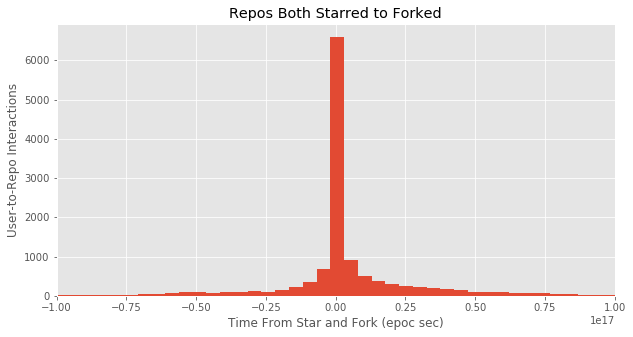

In [240]:
plt.figure(figsize=(10,5))
plt.hist(f_and_s_eda['time_star2fork_int'], bins=100)
plt.title("Repos Both Starred to Forked")
plt.xlabel("Time From Star and Fork (sec)")
plt.ylabel("User-to-Repo Interactions");
plt.xlim((-1e17,1e17));